<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/02Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [2]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [3]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [4]:
def show_model(themodel):
  for x in themodel.state_dict().items():
    for y in x:
      print (y, sep=" ", end="")
      print("\t", end="")
    print (" ")


##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


<Figure size 640x480 with 0 Axes>

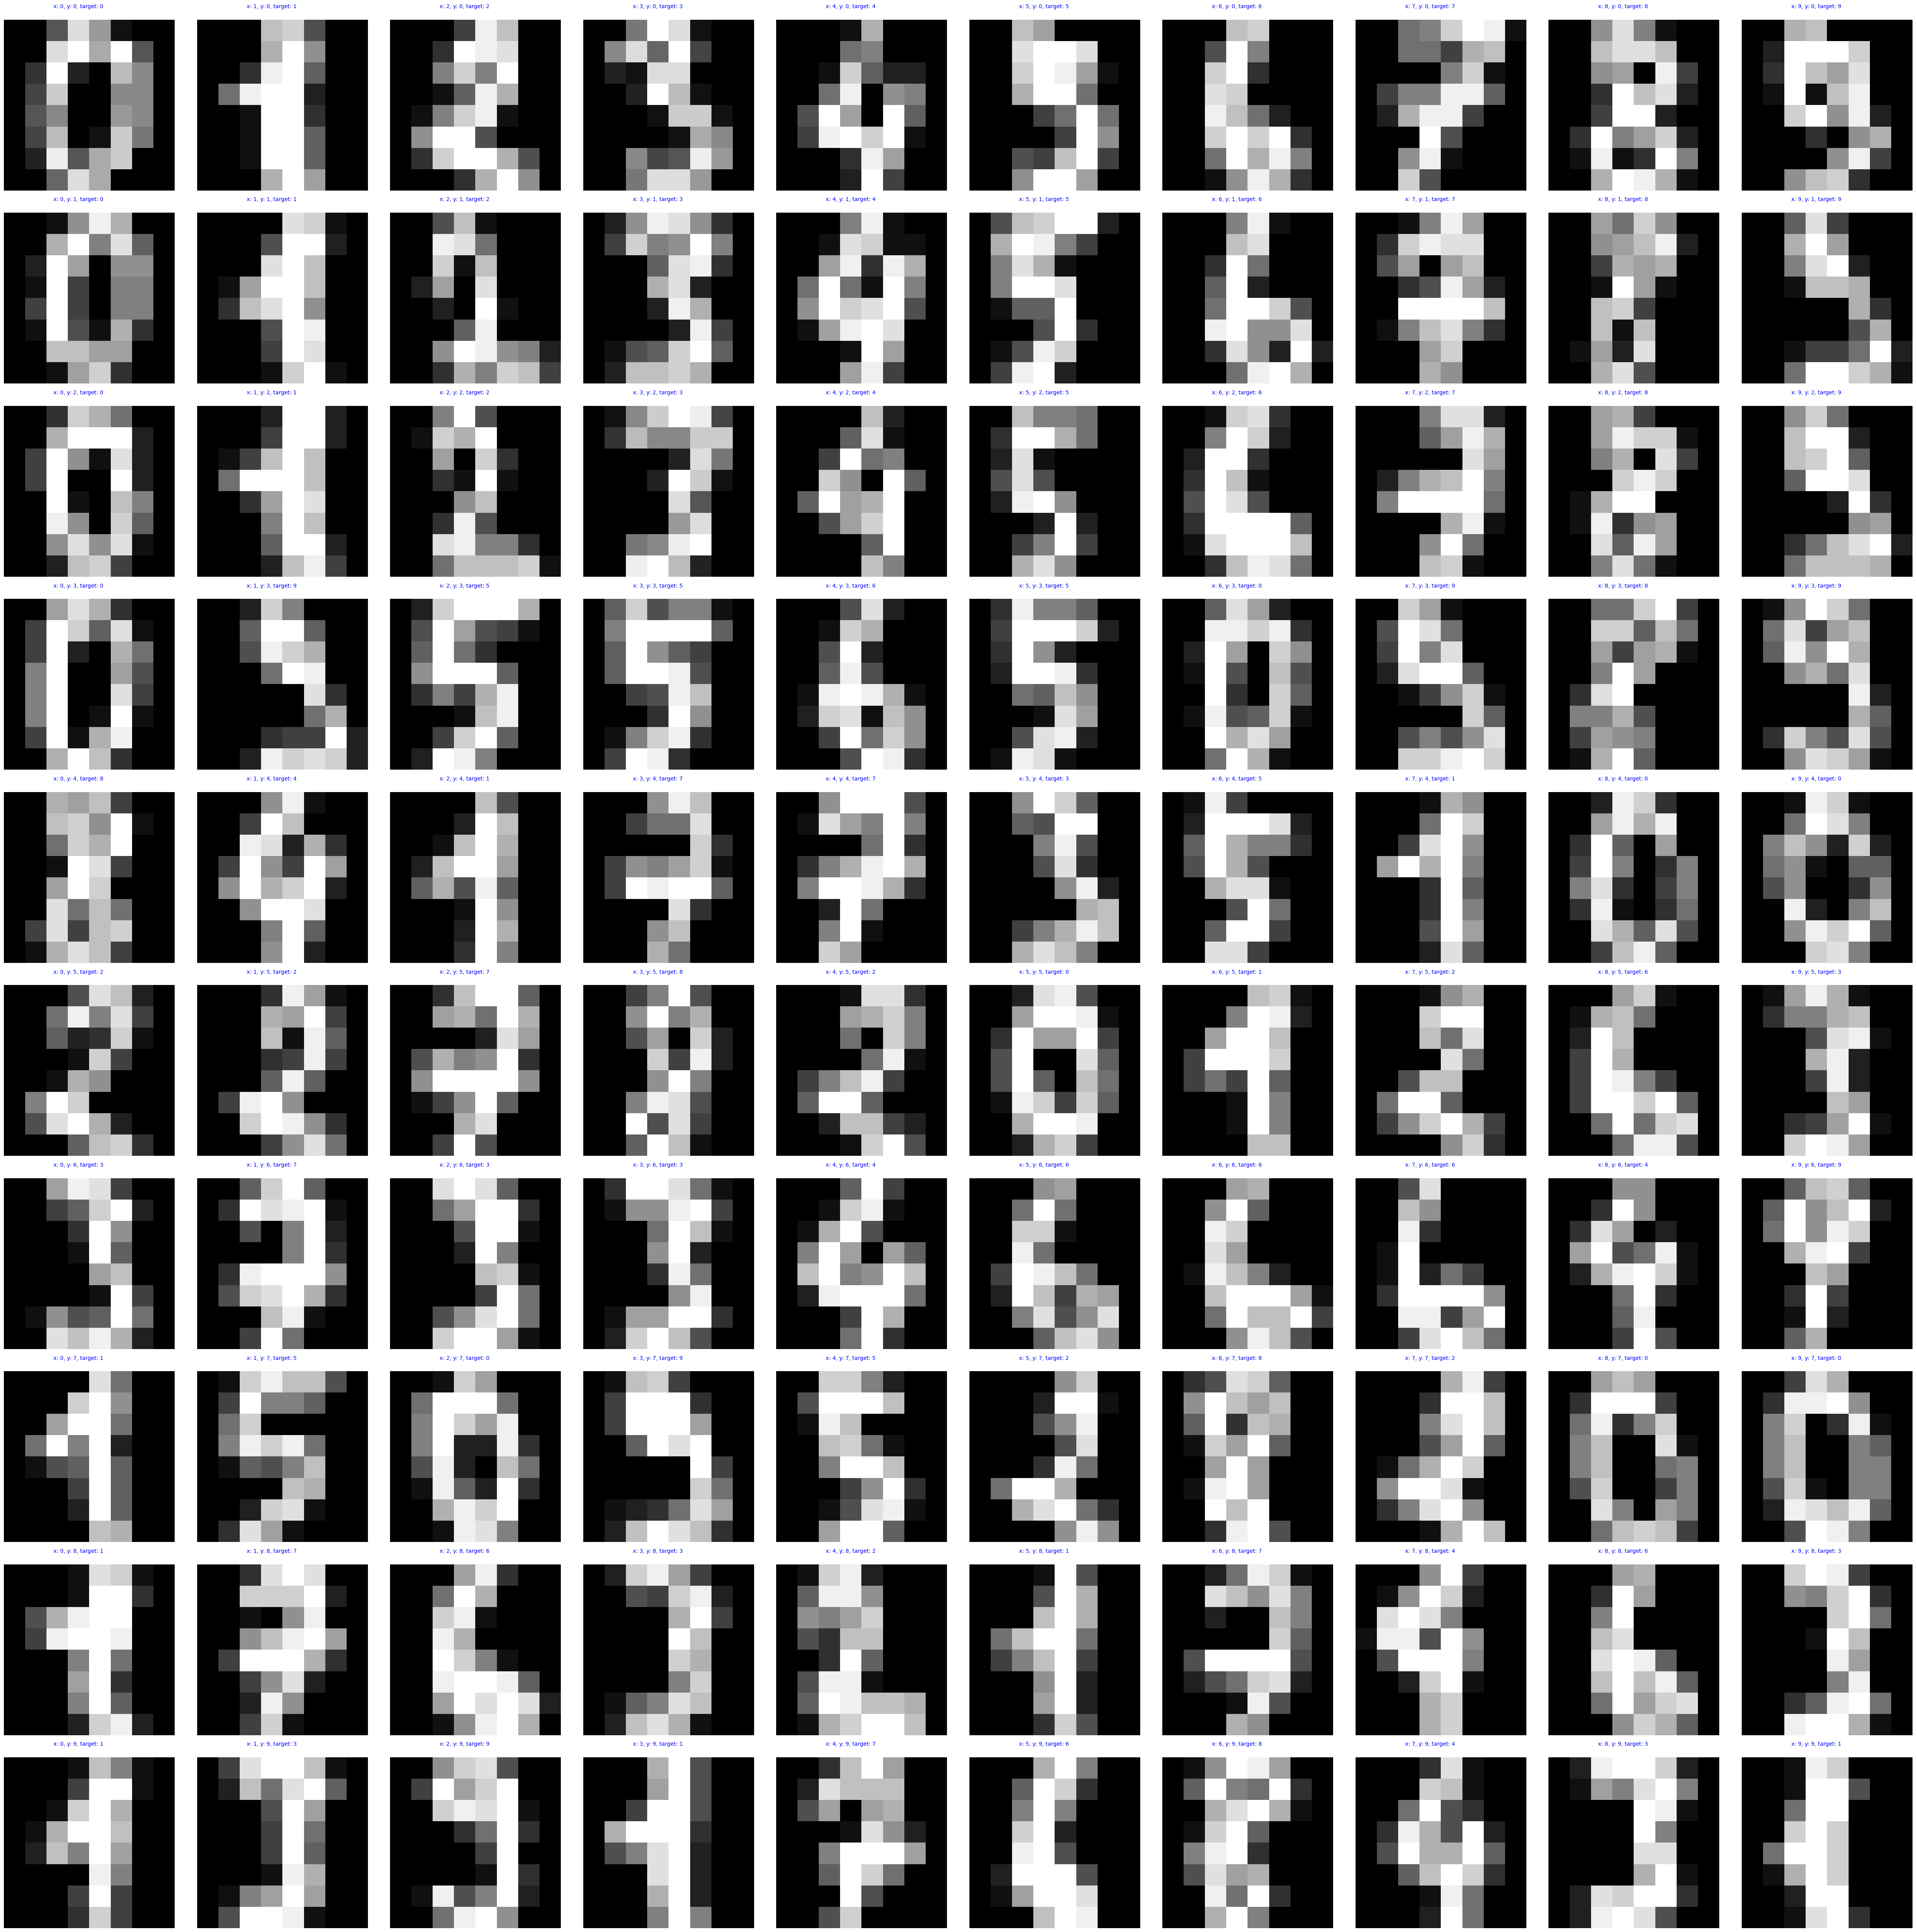

<function Bunch.items>

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
label_right = 3.0
label_top = -1.0

max_width = 10
max_height = 10
max_count = max_width * max_height

fig, axs = plt.subplots(max_height,max_width,figsize=(5 * max_width, 5 * max_height))
fig.tight_layout()

for digit in range(max_count):
  x = digit % max_width
  y = int(digit / max_width)
  axs[y,x].matshow(digits.images[digit])
  title_string = f"x: {x}, y: {y}, target: {digits.target[digit]}"
  axs[y,x].text(
        label_right, label_top,
        title_string,
        c="blue",
        horizontalalignment='center',
        verticalalignment='bottom')

  axs[y,x].set_xlabel(None)
  axs[y,x].set_ylabel(None)
  axs[y,x].set_axis_off()

plt.show()
digits.items


In [8]:
for x in digits:
  print(x, "\t", end="")
  match x:
    case 'data':
      print (digits.data[:5])
    case 'target':
      print (digits.target[:5])
    case 'frame':
      print (digits.frame)
    case 'feature_names':
      print (digits.feature_names[:5])
    case 'target_names':
      print (digits.target_names[:5])
    case 'images':
      for image in digits.images[:5]:
        print('image: ', image)
    case 'DESCR':
      print (digits.DESCR )
    case _:
      print('other', x)


data 	[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  

In [88]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt
from sklearn.datasets import load_digits

# Check PyTorch Version
torch.__version__

# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

# Get training data
digits = load_digits()

targets = torch.zeros([len(digits.target),10], dtype=torch.float32)

for y in range(len(digits.target)):
  for x in range(10):
    if y == digits.target[x]:
      targets[y,x] = 1
    else:
      targets[y,x] = 0

# Create training set
train_split = int(0.8 * len(digits.data))
X_all, y_all = digits.data, targets
X_train, y_train = digits.data[:train_split], targets[:train_split]
X_test, y_test   = digits.data[train_split:], targets[train_split:]

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_all   = torch.tensor(X_all,   dtype=torch.float32).to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
y_all  = torch.tensor(y_all,  dtype=torch.float32).to(device)

class identifyDigit(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 64, out_features= 4)
        self.layer_2 = nn.Linear(in_features = 4,  out_features= 10)

    def forward(self, x):
      l1 = self.layer_1(x)
      l2 = self.layer_2(l1)
      return (l2)



Device: cuda


<ipython-input-88-9207368df195>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
<ipython-input-88-9207368df195>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
<ipython-input-88-9207368df195>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_all  = torch.tensor(y_all,  dtype=torch.float32).to(device)


In [85]:
inputDim = 64       # takes 64 pixel input
outputDim = 10      # identifies digit 0 - 9
learningRate = 0.01
epochs = 10000
outputfunction = nn.LogSoftmax(dim = 1)
pos_weight = torch.ones([10]).to(device)
identifyDigit_model02 = identifyDigit().to(device)
y_train_softmax = outputfunction(y_train).to(device)
y_test_softmax  = outputfunction(y_test).to(device)
X_train.requires_grad=True

#criterion = torch.nn.MSELoss()
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.SGD(identifyDigit_model02.parameters(), lr=learningRate)

loss_list = []
test_loss_list = []
epoch_list = []

for epoch in range(epochs):
  optimizer.zero_grad()
# get output from the model, given the inputs
  output = identifyDigit_model02(X_train)
#  output_softmax = outputfunction(output)

  # get loss for the predicted output
  loss = criterion(output, y_train)

  # get gradients w.r.t to parameters
  loss.backward()

  # update parameters
  optimizer.step()

  # test model
  with torch.no_grad():
    output_test = identifyDigit_model02(X_test)
#    output_test_softmax = outputfunction(output_test)

    # get loss for the predicted output
    loss_test = criterion(output_test, y_test)

    epoch_list.append(epoch)
    loss_list.append(loss.item())
    test_loss_list.append(loss_test.item())

    if (epoch % int(epochs/10) == 0):
      print (f"Epoch: {epoch}, Loss: {loss.item()}, Loss Test: {loss_test.item()}")

print(loss)

Epoch: 0, Loss: 0.8304166793823242, Loss Test: 0.7315754890441895
Epoch: 1000, Loss: 0.006389095913618803, Loss Test: 0.0009810266783460975
Epoch: 2000, Loss: 0.00609033415094018, Loss Test: 0.0008302760543301702
Epoch: 3000, Loss: 0.005871472414582968, Loss Test: 0.0008280577603727579
Epoch: 4000, Loss: 0.005692180246114731, Loss Test: 0.0008436589268967509
Epoch: 5000, Loss: 0.005541875027120113, Loss Test: 0.0008599402499385178
Epoch: 6000, Loss: 0.005412572529166937, Loss Test: 0.0008736788295209408
Epoch: 7000, Loss: 0.005298218689858913, Loss Test: 0.0008846912533044815
Epoch: 8000, Loss: 0.005194449331611395, Loss Test: 0.0008934624493122101
Epoch: 9000, Loss: 0.005098346620798111, Loss Test: 0.0009006669279187918
tensor(0.0050, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


<Figure size 640x480 with 0 Axes>

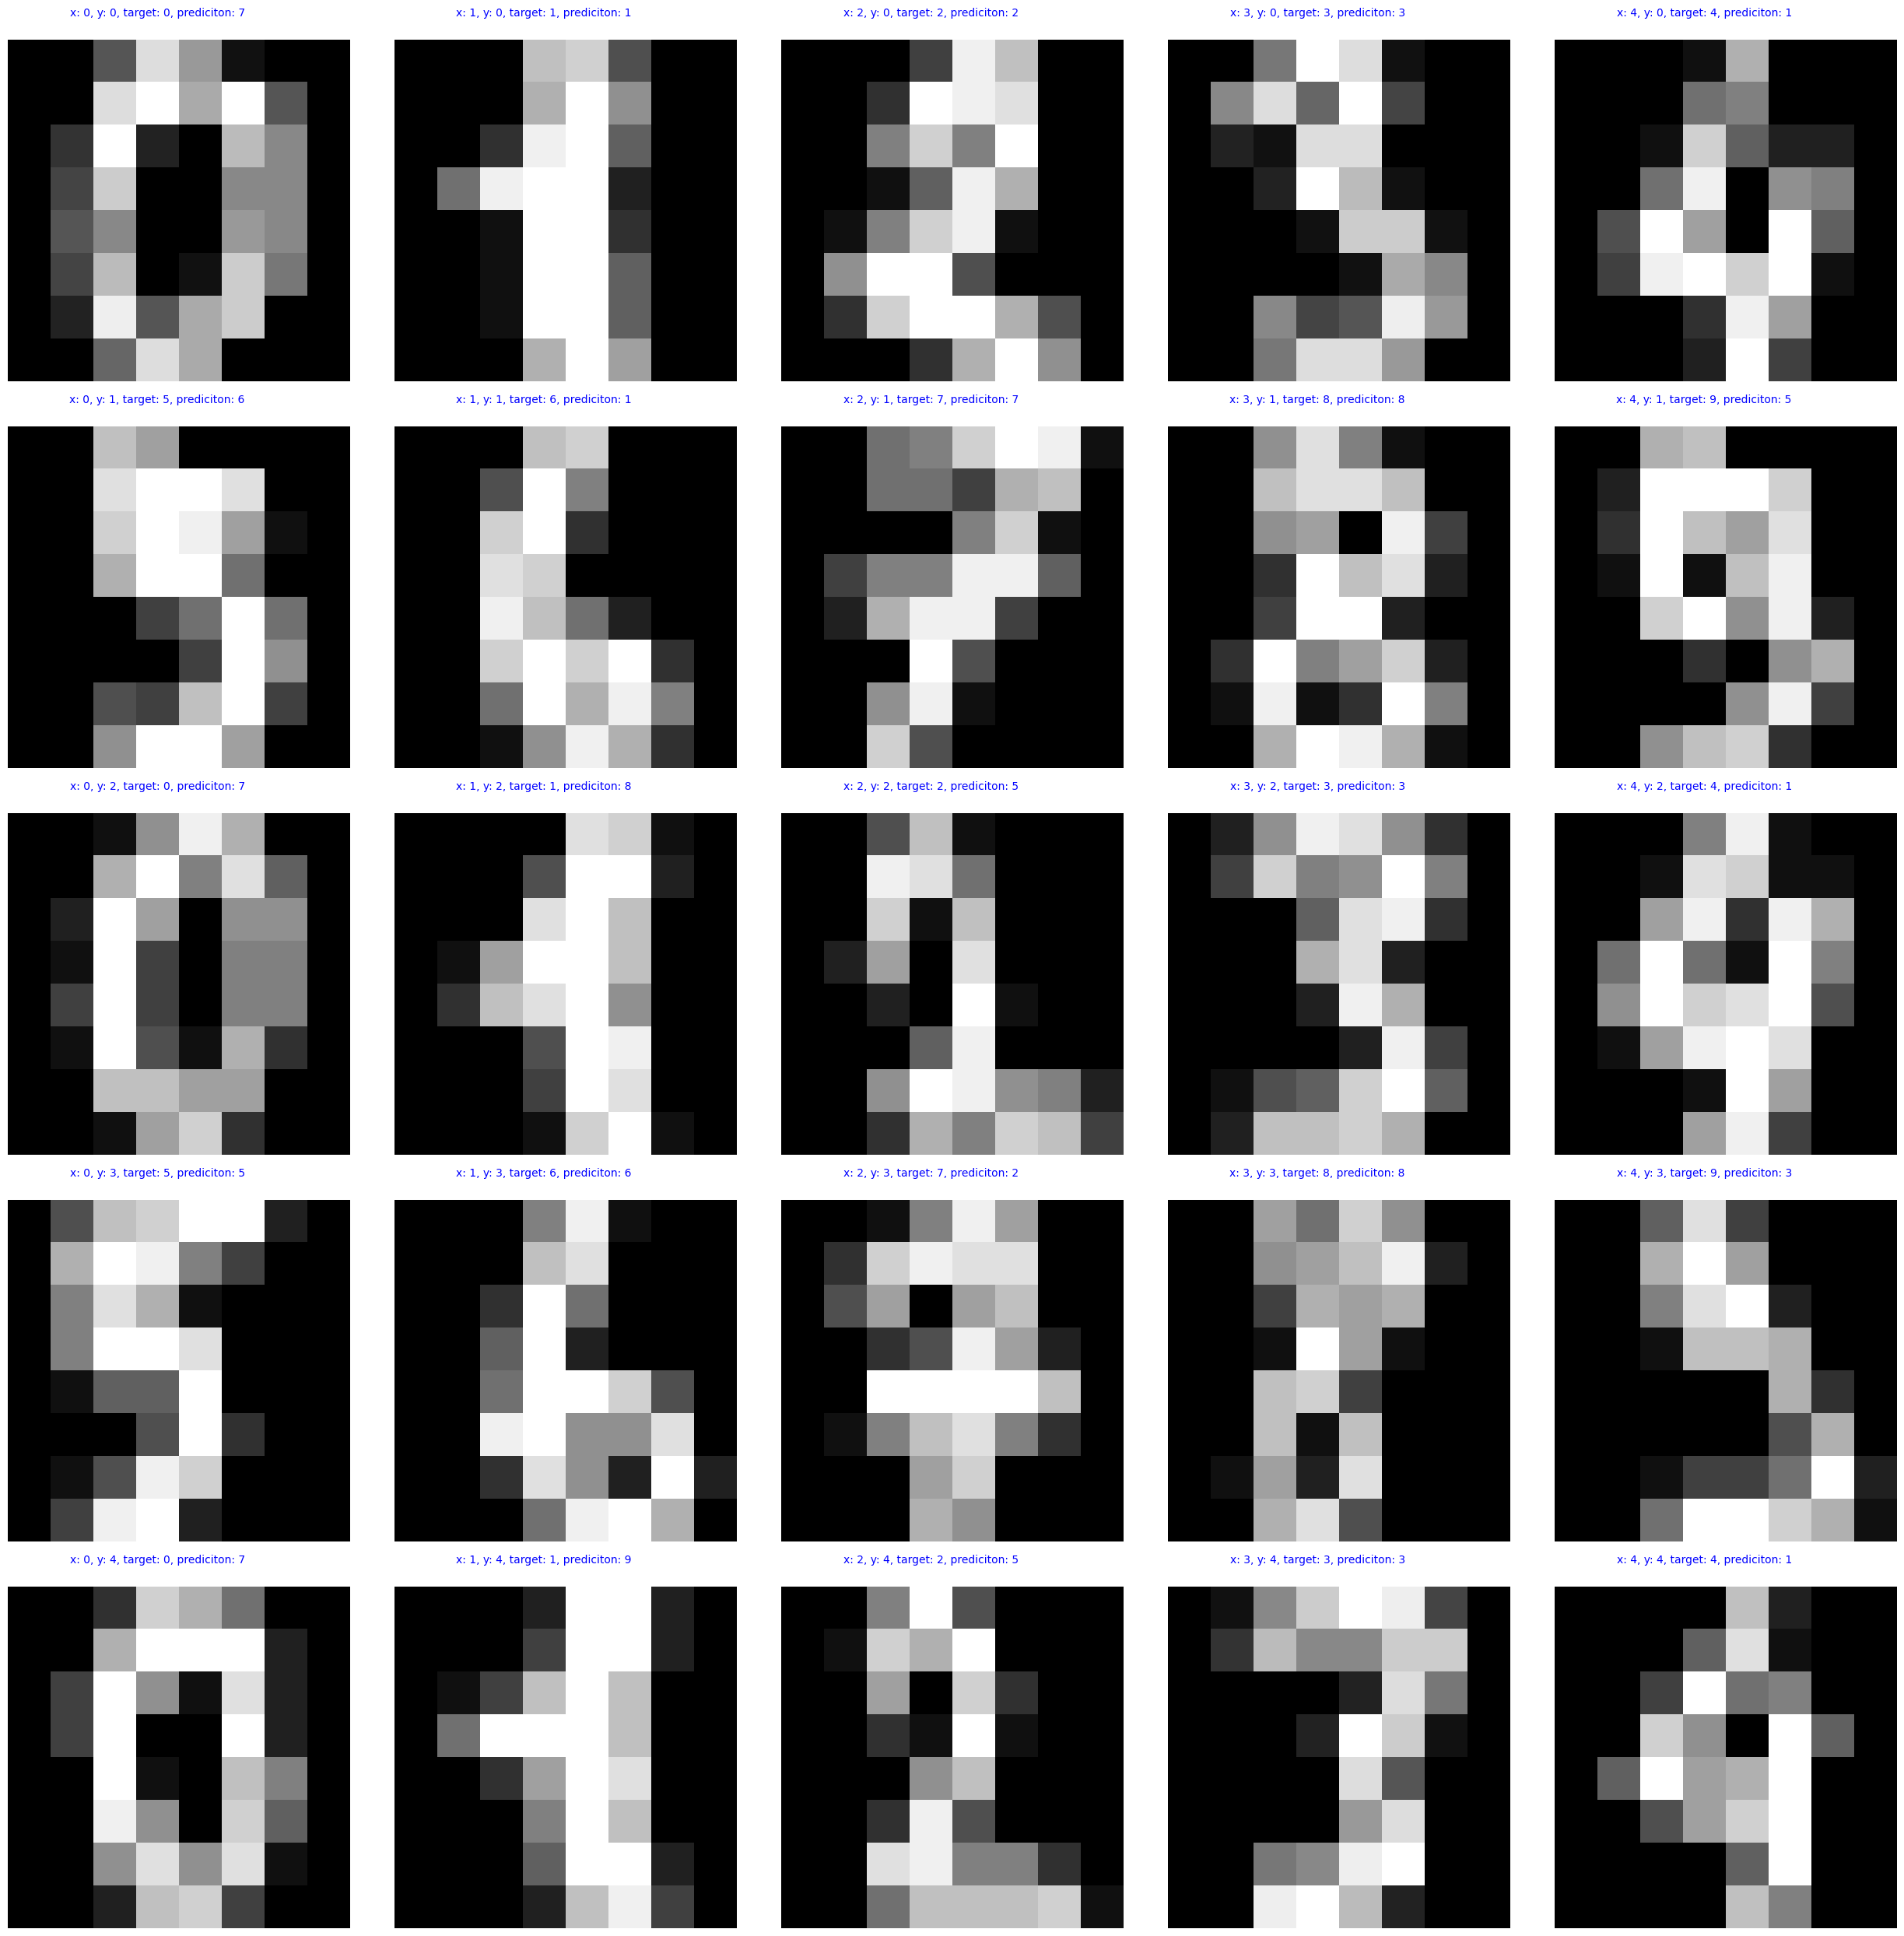

<function Bunch.items>

In [102]:
def digitText(output):
  max_output = -9999
  max_output_dig = None

  for dig in range(10):
    if output[dig] > max_output:
      max_output = output[dig]
      max_output_dig = dig

  return(max_output_dig)



from sklearn.datasets import load_digits

#digits = load_digits()
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
label_right = 3.0
label_top = -1.0

max_width = 5
max_height = 5
max_count = max_width * max_height

fig, axs = plt.subplots(max_height,max_width,figsize=(5 * max_width, 5 * max_height))
fig.tight_layout()

with torch.no_grad():
  for digit in range(max_count):
    x = digit % max_width
    y = int(digit / max_width)
    axs[y,x].matshow(digits.images[digit])
    input = torch.tensor(digits.data[digit], dtype=torch.float32).to(device)
    output = identifyDigit_model02(input)
    prediciton = digitText(output)
  #  output_test_text = digitText(output_test)

    title_string = f"x: {x}, y: {y}, target: {digits.target[digit]}, prediciton: {prediciton}"
    axs[y,x].text(
          label_right, label_top,
          title_string,
          c="blue",
          horizontalalignment='center',
          verticalalignment='bottom')

    axs[y,x].set_xlabel(None)
    axs[y,x].set_ylabel(None)
    axs[y,x].set_axis_off()

plt.show()
digits.items




In [98]:
# test model
with torch.no_grad():
  for x in X_test:
    output_test = identifyDigit_model02(x)
    output_test_text = digitText(output_test)
    print(f"output_test: {output_test}")
    print(f"output_test_text: {output_test_text}")

output_test: tensor([-10.6479,  -8.4358, -10.4448,  -7.3446,  -8.6716,  -8.4585,  -7.5758,
        -11.0109,  -8.4164,  -7.3190], device='cuda:0')
output_test_text: 9
output_test: tensor([-10.4875,  -8.2222, -10.0752,  -6.5080,  -8.0430,  -7.9356,  -6.6278,
        -11.0501,  -7.8604,  -6.6965], device='cuda:0')
output_test_text: 3
output_test: tensor([-7.8593, -8.2913, -7.3448, -9.5007, -7.4030, -7.7853, -7.6413, -8.6353,
        -6.6580, -7.9577], device='cuda:0')
output_test_text: 8
output_test: tensor([-10.3090,  -9.4309, -10.3203,  -6.5975,  -9.2043,  -8.0412,  -8.0871,
        -10.3527,  -9.3295,  -7.3394], device='cuda:0')
output_test_text: 3
output_test: tensor([-8.2101, -9.3201, -7.8915, -8.5447, -8.1658, -7.6391, -8.1084, -8.6738,
        -7.8196, -7.9408], device='cuda:0')
output_test_text: 5
output_test: tensor([ -6.7038, -11.6338,  -7.1532,  -9.4390,  -9.9851,  -7.5159, -11.0423,
         -6.2470, -10.1007,  -9.4092], device='cuda:0')
output_test_text: 7
output_test: tenso